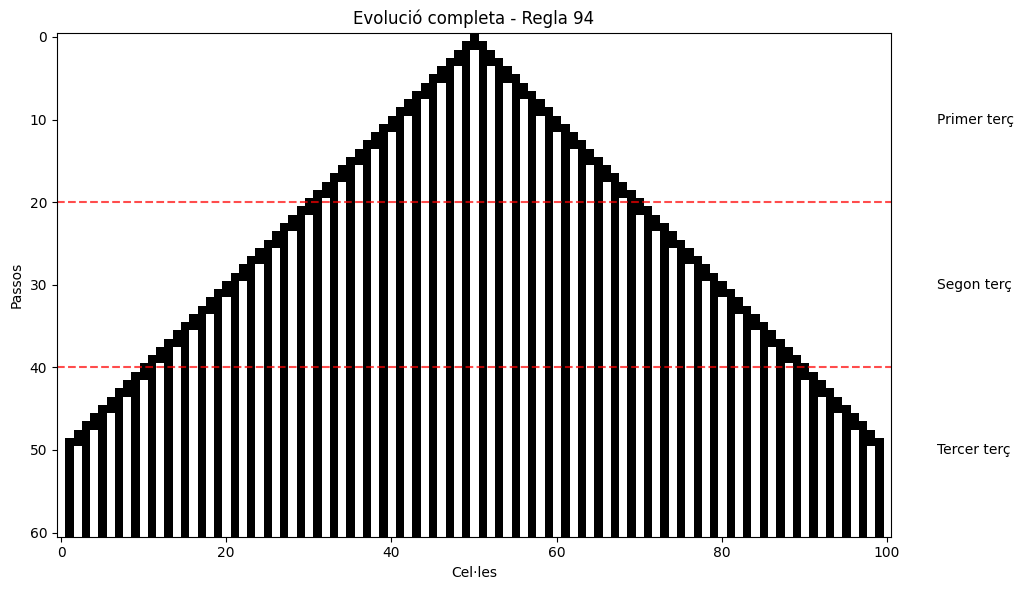

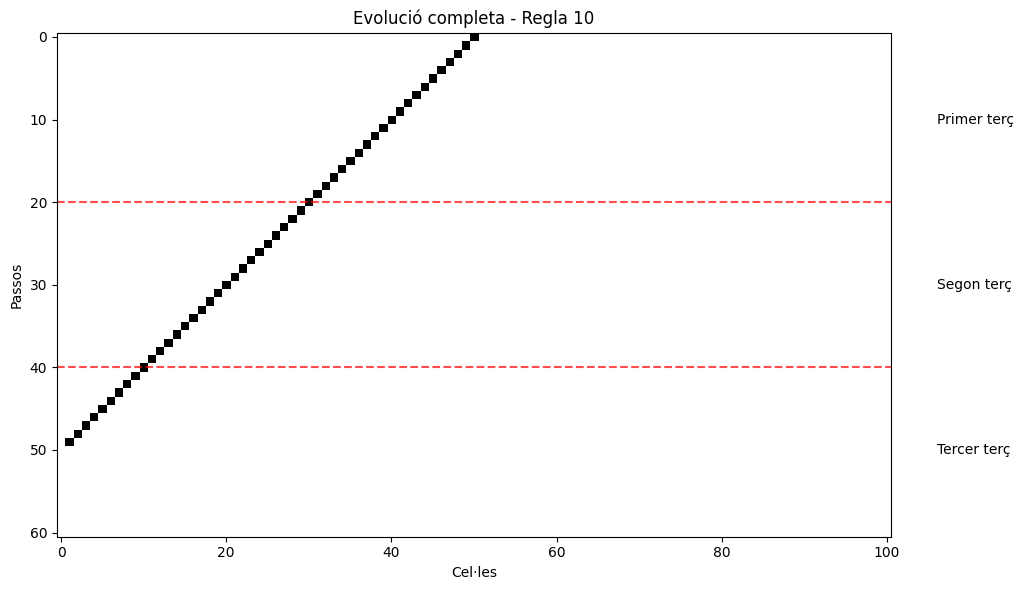

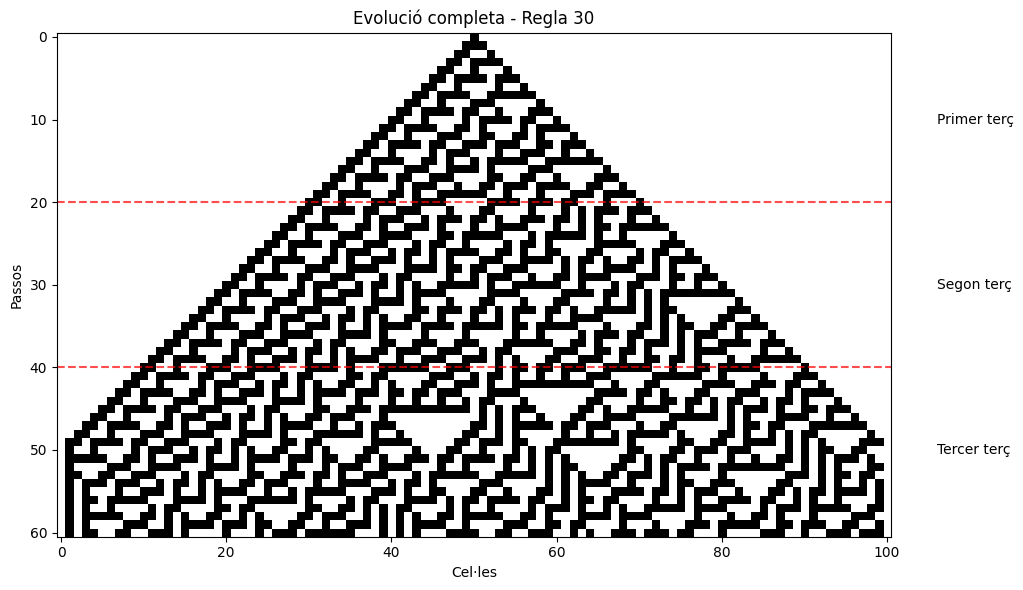

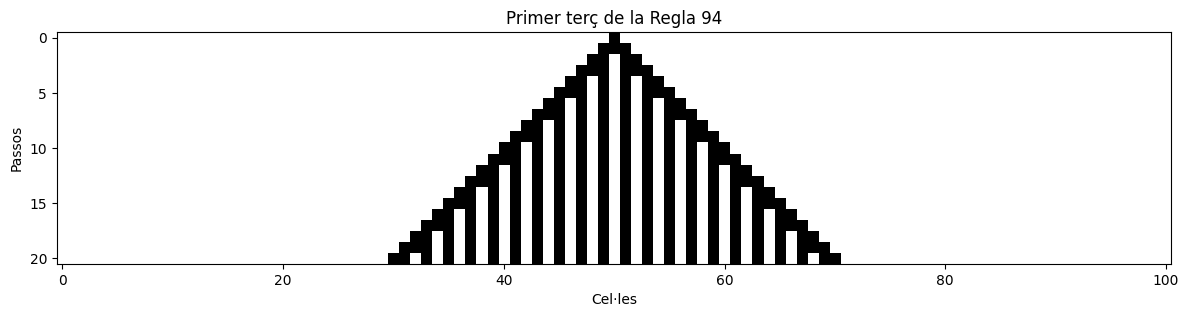

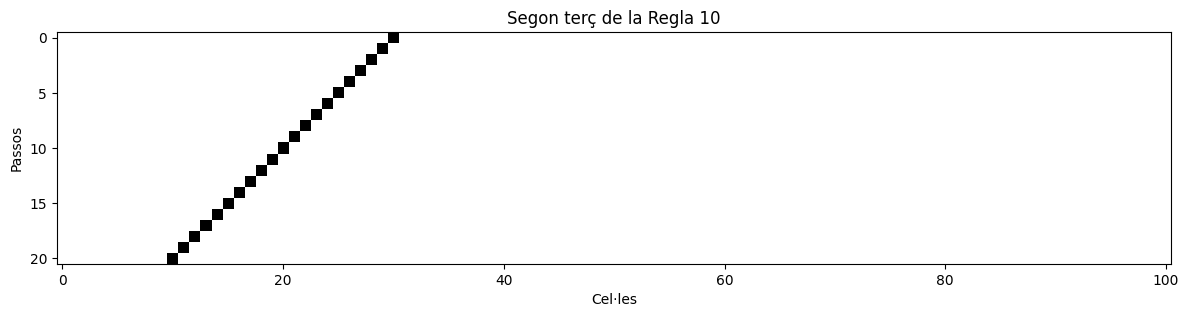

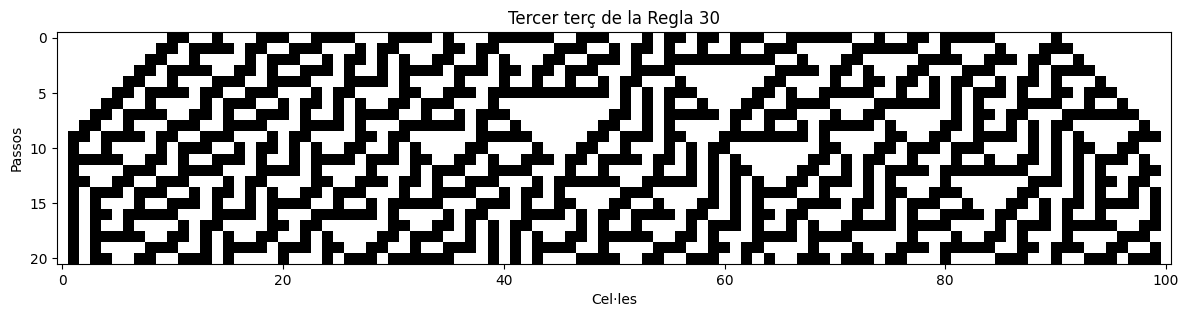

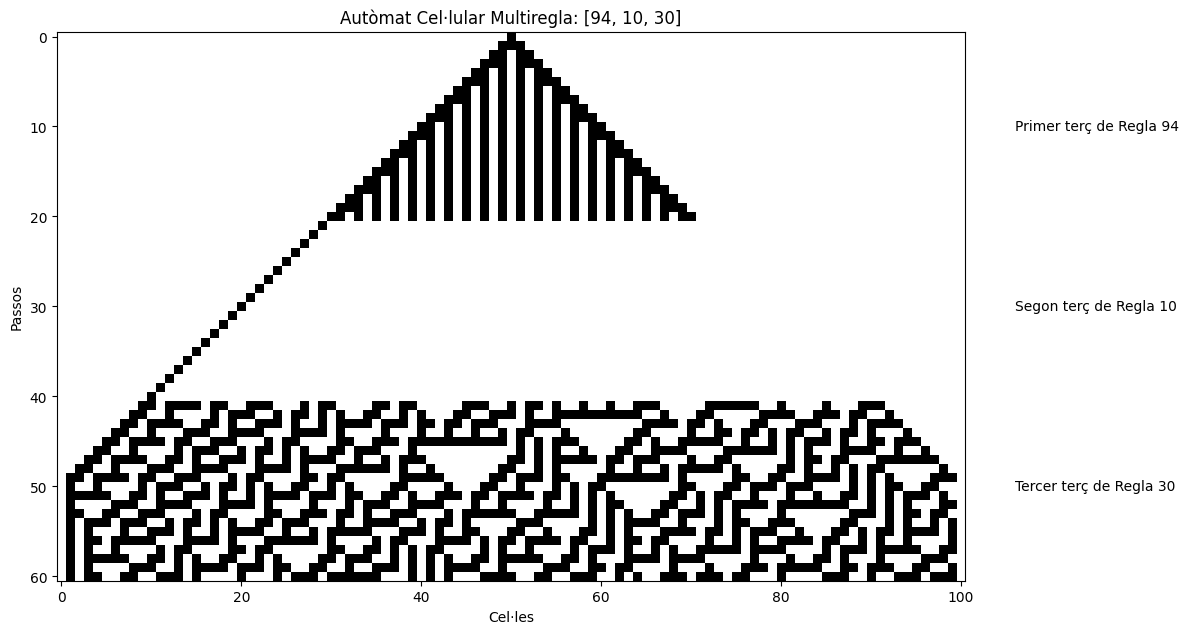

In [11]:

import matplotlib.pyplot as plt
import numpy as np

class AutomatCellularMultiregla:
    def __init__(self, regles, longitud, passos):
        self.regles = regles
        self.longitud = longitud
        self.passos = passos
        
        # Calculamos cuántos pasos para cada regla (división equitativa)
        self.passos_per_regla = []
        passos_restants = passos
        for i in range(len(regles) - 1):
            passos_regla = passos // len(regles)
            self.passos_per_regla.append(passos_regla)
            passos_restants -= passos_regla
        self.passos_per_regla.append(passos_restants)  # El último recibe los pasos restantes
        
        # Estado inicial: solo la celda central activada
        self.estat_actual = np.zeros(longitud, dtype=int)
        self.estat_actual[longitud // 2] = 1
        
        # Para almacenar la evolución completa
        self.historial = []
        # Para almacenar la evolución por cada regla
        self.historials_per_regla = [[] for _ in regles]
        
        # Para almacenar los tercios de cada regla
        self.tercios_por_regla = []

    def aplica_regla(self, regla_bin):
        estat_nou = np.zeros_like(self.estat_actual)
        for i in range(1, self.longitud - 1):
            veinat = self.estat_actual[i - 1:i + 2]
            index = 7 - int(''.join(veinat.astype(str)), 2)
            estat_nou[i] = regla_bin[index]
        self.estat_actual = estat_nou

    def executa(self):
        # Guardamos el estado inicial en el historial completo
        self.historial.append(self.estat_actual.copy())
        estat_inicial = self.estat_actual.copy()
        
        # Ejecutamos cada regla completa para obtener sus tercios
        for idx, regla in enumerate(self.regles):
            # Reiniciamos al estado inicial para cada regla
            self.estat_actual = estat_inicial.copy()
            
            # Convertimos la regla a binario (8 bits)
            regla_bin = np.array([int(bit) for bit in np.binary_repr(regla, width=8)])
            
            # Ejecutamos la regla para todos los pasos
            historial_regla = [self.estat_actual.copy()]
            for _ in range(self.passos):
                self.aplica_regla(regla_bin)
                historial_regla.append(self.estat_actual.copy())
            
            # Guardamos el historial completo de esta regla
            self.historials_per_regla[idx] = historial_regla
            
            # Dividimos el historial en tercios
            tercio_size = self.passos // 3
            tercios = [
                historial_regla[:tercio_size + 1],  # Primer tercio (incluye estado inicial)
                historial_regla[tercio_size:2*tercio_size + 1],  # Segundo tercio
                historial_regla[2*tercio_size:]  # Tercer tercio
            ]
            self.tercios_por_regla.append(tercios)
        
        # Ahora construimos el historial combinado usando diferentes tercios
        self.historial = [estat_inicial.copy()]  # Reiniciamos el historial
        
        for idx, regla in enumerate(self.regles):
            # Seleccionamos el tercio correspondiente según el índice de la regla
            tercio_a_usar = idx % 3  # 0: primer tercio, 1: segundo tercio, 2: tercer tercio
            
            # Añadimos los estados de este tercio (sin el estado inicial si no es el primero)
            if idx == 0:
                self.historial.extend(self.tercios_por_regla[idx][tercio_a_usar][1:])
            else:
                # Saltamos el primer estado ya que continúa del anterior
                self.historial.extend(self.tercios_por_regla[idx][tercio_a_usar][1:])

    def mostra_regla_tercio(self, idx_regla, idx_tercio):
        plt.figure(figsize=(12, 6))
        plt.imshow(self.tercios_por_regla[idx_regla][idx_tercio], cmap='binary')
        plt.xlabel('Cel·les')
        plt.ylabel('Passos')
        tercio_nombres = ["Primer", "Segon", "Tercer"]
        plt.title(f'{tercio_nombres[idx_tercio]} terç de la Regla {self.regles[idx_regla]}')
        plt.tight_layout()
        plt.show()

    def mostra_regla_completa(self, idx_regla):
        plt.figure(figsize=(12, 6))
        plt.imshow(self.historials_per_regla[idx_regla], cmap='binary')
        plt.xlabel('Cel·les')
        plt.ylabel('Passos')
        plt.title(f'Evolució completa - Regla {self.regles[idx_regla]}')
        
        # Añadimos líneas para separar visualmente los tercios
        tercio_size = self.passos // 3
        plt.axhline(y=tercio_size, color='red', linestyle='--', alpha=0.7)
        plt.axhline(y=2*tercio_size, color='red', linestyle='--', alpha=0.7)
        
        # Añadimos etiquetas para cada tercio
        plt.text(self.longitud + 5, tercio_size // 2, "Primer terç", 
                 verticalalignment='center', color='black')
        plt.text(self.longitud + 5, tercio_size + tercio_size // 2, "Segon terç", 
                 verticalalignment='center', color='black')
        plt.text(self.longitud + 5, 2*tercio_size + (self.passos - 2*tercio_size) // 2, "Tercer terç", 
                 verticalalignment='center', color='black')
        
        plt.tight_layout()
        plt.show()

    def mostra_tot(self):
        plt.figure(figsize=(12, 8))
        plt.imshow(self.historial, cmap='binary')
        plt.xlabel('Cel·les')
        plt.ylabel('Passos')
        
        # Añadimos etiquetas para cada sección (sin líneas divisorias)
        tercio_size = len(self.historial) // len(self.regles)
        tercio_nombres = ["Primer", "Segon", "Tercer"]
        for i in range(len(self.regles)):
            pos_y = i*tercio_size + tercio_size // 2
            plt.text(self.longitud + 5, pos_y, 
                     f"{tercio_nombres[i % 3]} terç de Regla {self.regles[i]}", 
                     verticalalignment='center', color='black')
        
        plt.title(f'Autòmat Cel·lular Multiregla: {self.regles}')
        plt.tight_layout()
        plt.show()

    def mostra_tot_amb_separacio(self):
        # Primero mostramos cada regla completa con sus tercios marcados
        for i in range(len(self.regles)):
            self.mostra_regla_completa(i)
        
        # Luego mostramos los tercios específicos que estamos usando
        for i in range(len(self.regles)):
            tercio_a_usar = i % 3  # 0: primer tercio, 1: segundo tercio, 2: tercer tercio
            self.mostra_regla_tercio(i, tercio_a_usar)
        
        # Finalmente mostramos la evolución combinada (sin líneas divisorias)
        self.mostra_tot()

# Ejemplo de uso con tres reglas
aut_multiregla = AutomatCellularMultiregla(regles=[94, 10, 30], longitud=101, passos=60)
aut_multiregla.executa()
aut_multiregla.mostra_tot_amb_separacio()